<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 8: Histograms

Associated Textbook Sections: [7.2](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-8:-Histograms" data-toc-modified-id="Lecture-8:-Histograms-1">Lecture 8: Histograms</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#Distributions" data-toc-modified-id="Distributions-1.3">Distributions</a></span><ul class="toc-item"><li><span><a href="#Terminology" data-toc-modified-id="Terminology-1.3.1">Terminology</a></span></li></ul></li><li><span><a href="#Distributions-of-Categorical-Variables" data-toc-modified-id="Distributions-of-Categorical-Variables-1.4">Distributions of Categorical Variables</a></span><ul class="toc-item"><li><span><a href="#Demo:-Categorical-Distribution" data-toc-modified-id="Demo:-Categorical-Distribution-1.4.1">Demo: Categorical Distribution</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1.4.2">Visualization</a></span></li><li><span><a href="#Demo:-Bar-Charts" data-toc-modified-id="Demo:-Bar-Charts-1.4.3">Demo: Bar Charts</a></span></li><li><span><a href="#Displaying-a-Categorical-Distribution" data-toc-modified-id="Displaying-a-Categorical-Distribution-1.4.4">Displaying a Categorical Distribution</a></span></li></ul></li><li><span><a href="#Distributions-of-Numerical-Variables" data-toc-modified-id="Distributions-of-Numerical-Variables-1.5">Distributions of Numerical Variables</a></span><ul class="toc-item"><li><span><a href="#Binning-Numerical-Values" data-toc-modified-id="Binning-Numerical-Values-1.5.1">Binning Numerical Values</a></span></li><li><span><a href="#Demo:-Binning" data-toc-modified-id="Demo:-Binning-1.5.2">Demo: Binning</a></span></li></ul></li><li><span><a href="#Area-Principle" data-toc-modified-id="Area-Principle-1.6">Area Principle</a></span><ul class="toc-item"><li><span><a href="#Binning-Numerical-Values" data-toc-modified-id="Binning-Numerical-Values-1.6.1">Binning Numerical Values</a></span></li><li><span><a href="#Area-Principle" data-toc-modified-id="Area-Principle-1.6.2">Area Principle</a></span></li></ul></li><li><span><a href="#Drawing-Histograms" data-toc-modified-id="Drawing-Histograms-1.7">Drawing Histograms</a></span><ul class="toc-item"><li><span><a href="#Histograms" data-toc-modified-id="Histograms-1.7.1">Histograms</a></span></li><li><span><a href="#Demo:-Histograms" data-toc-modified-id="Demo:-Histograms-1.7.2">Demo: Histograms</a></span></li></ul></li><li><span><a href="#Density" data-toc-modified-id="Density-1.8">Density</a></span><ul class="toc-item"><li><span><a href="#Histogram-Axes" data-toc-modified-id="Histogram-Axes-1.8.1">Histogram Axes</a></span></li><li><span><a href="#Binning-Numerical-Values" data-toc-modified-id="Binning-Numerical-Values-1.8.2">Binning Numerical Values</a></span></li><li><span><a href="#How-to-Calculate-Height" data-toc-modified-id="How-to-Calculate-Height-1.8.3">How to Calculate Height</a></span></li><li><span><a href="#Height-Measures-Density" data-toc-modified-id="Height-Measures-Density-1.8.4">Height Measures Density</a></span></li><li><span><a href="#Area-Measures-Percent" data-toc-modified-id="Area-Measures-Percent-1.8.5">Area Measures Percent</a></span></li><li><span><a href="#Area-or-Height" data-toc-modified-id="Area-or-Height-1.8.6">Area or Height</a></span></li><li><span><a href="#Bar-Chart-or-Histogram?" data-toc-modified-id="Bar-Chart-or-Histogram?-1.8.7">Bar Chart or Histogram?</a></span></li></ul></li></ul></li></ul></div>

## Distributions

### Terminology

* Individuals: those whose features are recorded
* Variable: a feature, an attribute
* A variable has different values
* Values can be numerical or categorical, and of many subtypes within these 
* Each individual has exactly one value of the variable
* Distribution: For each different value of the variable, the frequency of individuals that have that value

## Distributions of Categorical Variables

### Demo: Categorical Distribution

Load the top_movies_2017.csv data set.

In [2]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


Use the `group` method to show the distribution of studios.

In [3]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [4]:
studio_distribution = studios.group('Studio')
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [5]:
sum(studio_distribution.column('count'))

200

### Visualization

* Bar charts are commonly used to visualize categorical distributions
* One axis is categorical, one numerical

### Demo: Bar Charts

Visualize the distribution of studios.

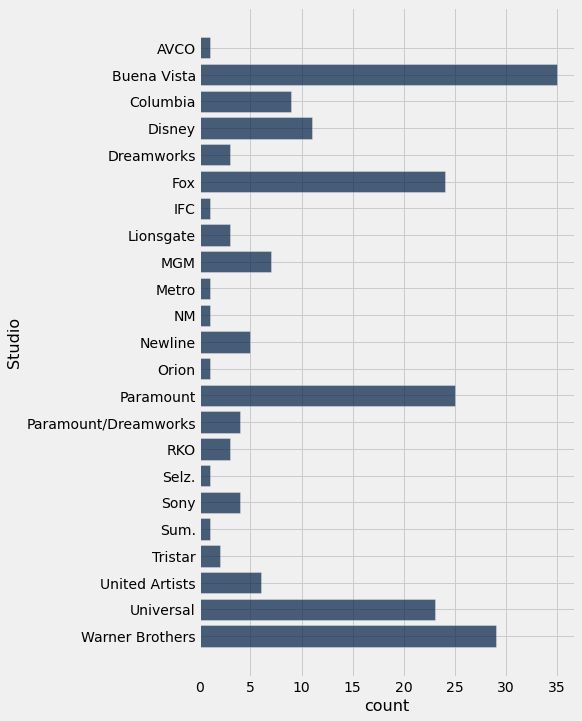

In [6]:
studio_distribution.barh('Studio')

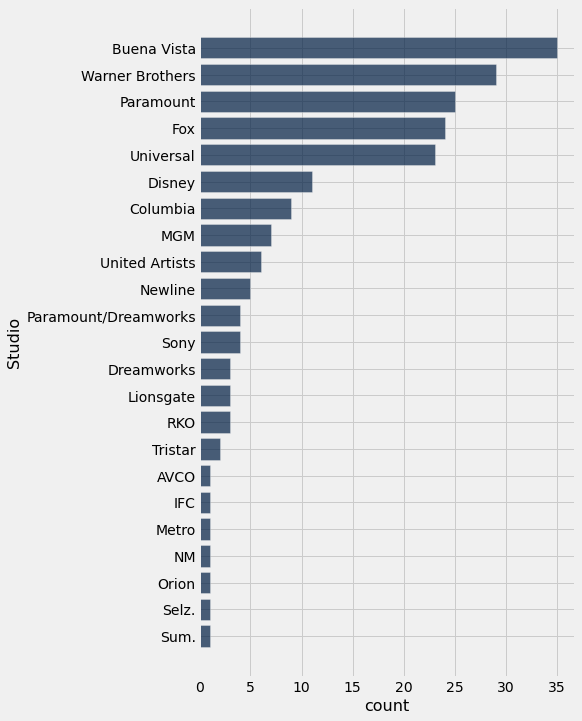

In [7]:
studio_distribution.sort('count', descending=True).barh('Studio')

### Displaying a Categorical Distribution

* The distribution of a variable (a column, e.g. Studios) describes the frequencies of its different values
* The group method counts the number of rows for each value in the column (e.g. the number of top movies released by each studio)
* Bar charts can display the distribution of a categorical variable (e.g. studios):
    * One bar for each category
    * Length of bar is the count of individuals in that category
    * You can choose the order of the bars


## Distributions of Numerical Variables

### Binning Numerical Values

Binning is counting the number of numerical values that lie within ranges, called bins.
* Bins are defined by their lower bounds (inclusive)
* The upper bound is the lower bound of the next bin

For example, the values 188, 170, 189, 163, 183, 171, 185, 168, 173, ... could be binned as follows:

<img src="./img/binning_example.png" width = 80%>

### Demo: Binning

Define the age of the move and create various bins for organizing those ages.

In [8]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [9]:
ages = 2022 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Age
Gone with the Wind,MGM,198676459,1796176700,1939,83
Star Wars,Fox,460998007,1583483200,1977,45
The Sound of Music,Fox,158671368,1266072700,1965,57
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,40
Titanic,Paramount,658672302,1204368000,1997,25
The Ten Commandments,Paramount,65500000,1164590000,1956,66
Jaws,Universal,260000000,1138620700,1975,47
Doctor Zhivago,MGM,111721910,1103564200,1965,57
The Exorcist,Warner Brothers,232906145,983226600,1973,49
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,85


In [10]:
min(ages), max(ages)

(5, 101)

In [11]:
my_bins = make_array(0, 5, 10, 15, 25, 40, 65, 100)

In [12]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,20
100,0


In [13]:
sum(binned_data.column('Age count'))

199

In [14]:
top_movies.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,81
25,70
50,39
75,9
100,0


In [15]:
top_movies.bin('Age', bins = np.arange(0, 60, 25))

bin,Age count
0,81
25,73
50,0


In [16]:
top_movies.where('Age', 50)

Title,Studio,Gross,Gross (Adjusted),Year,Age
The Godfather,Paramount,134966411,701621600,1972,50
The Poseidon Adventure,Fox,84563118,488078400,1972,50
"What's Up, Doc?",Warner Brothers,66000000,345141200,1972,50


## Area Principle

### Binning Numerical Values

### Area Principle

Areas should be proportional to the values they represent.

* For example, if you represent 20% with ■, then 40% should be represented with twice that area ■■.
* Below is [a visual example from Gizmodo in 2012](https://gizmodo.com/holy-f-ck-the-new-ipad-has-a-gigantic-70-percent-large-5893738) that mislead readers about the new iPad battery.

<img src="./img/ipad_battery_comparison.jpeg" width = 50%>

## Drawing Histograms

### Histograms

* Chart that displays the distribution of a numerical variable
* Uses bins; there is one bar corresponding to each bin
* Uses the area principle: The area of each bar is the percent of individuals in the corresponding bin


### Demo: Histograms

Create a histogrm of the ages.

In [17]:
my_bins

array([  0,   5,  10,  15,  25,  40,  65, 100])

In [18]:
binned_data

bin,Age count
0,0
5,25
10,16
15,40
25,42
40,56
65,20
100,0


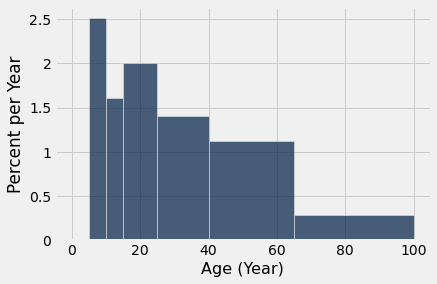

In [19]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

Try using equally spaced bins instead.

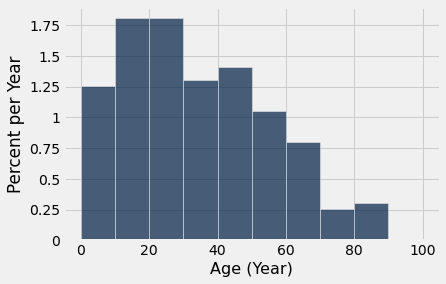

In [20]:
top_movies.hist('Age', bins = np.arange(0, 110, 10), unit = 'Year')

See what happens when you don't specify any bins.

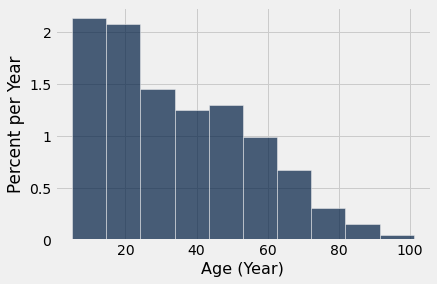

In [21]:
top_movies.hist('Age', unit='Year')

Add a column containing what percent of movies are in each bin.

In [22]:
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)
binned_data

bin,Age count,Percent
0,0,0
5,25,12.5
10,16,8
15,40,20
25,42,21
40,56,28
65,20,10
100,0,0


What is the height of the [40, 65] bin?

Calculate % of movies in the [40, 65) bin.

In [23]:
percent = binned_data.where('bin', 40).column('Percent').item(0)

Calculate the width of the 40-65 bin.

In [24]:
width = 65 - 40

Recall that the area of the bar of rectangle equals the height time the width of the bar. So, the height of the bar equals the percent in the bar (area) divided by the width of the bar.

In [25]:
height = percent / width
height

1.12

What are the heights of the rest of the bins?

In [26]:
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)
bin_lefts

bin,Age count,Percent,Width,Height
0,0,0,5,0
5,25,12.5,5,2.5
10,16,8,5,1.6
15,40,20,10,2
25,42,21,15,1.4
40,56,28,25,1.12
65,20,10,35,0.285714


## Density

### Histogram Axes

* By default, `hist` uses a scale (`normed=True`) that ensures the area of the chart sums to 100%
* The area of each bar is a percentage of the whole
* The horizontal axis is a number line (e.g., years), and the bins sizes don't have to be equal to each other
* The vertical axis is a rate (e.g., percent per year)

### Binning Numerical Values

### How to Calculate Height

The $[40, 65)$ bin contains $51$ out of $200$ movies
* $52$ out of $200$ is $25.5\%$
* The bin is $65 - 40 = 25$ years wide
* The height of the bar is calculated to be: $$\frac{25.5 \text{ percent}}{25 \text{ years}} = 1.02 \text{ percent per year}$$


### Height Measures Density

* The height measures the percent of data in the bin relative to the amount of space in the bin.
* The general formula for height is: $$\text{height } = \frac{\text{percent in bin}}{\text{width of bin}}$$
* Height measures crowdedness, or density.
* Units: percent per unit on the horizontal axis



### Area Measures Percent

* The area of a bar is the percent in the bin.
* The area of a bar can be calculated by the formula: $\text{area of a bar } = \text{ height of the bar} \times \text{ width of bin}$.


### Area or Height

In general:
* Use area when addressing a question like "How many individuals in the bin?"
* Use height when addressing a question like "How crowded is the bin?"

### Bar Chart or Histogram?

* Use a bar chart to visualize when the:
    * Distribution of categorical variable
    * Bars have arbitrary (but equal) widths and spacings 
    * Height (or length) and area of bars proportional to the percent of individuals
* Use a histogram to visualize when the:
    * Distribution of numerical variable
    * Horizontal axis is numerical: to scale, no gaps, bins can be unequal
    * Area of bars proportional to the percent of individuals; height measures density

<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>